# Chapter05 離散型確率変数

In [112]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline


## 5.1 1次元の離散型確率変数

### 5.1.1 1次元の離散型確率変数の定義

- 確率変数は、
  - 「とりうる値」と「その値が出る確率」によって定義される
- 離散型確率変数の場合、
  - 確率変数 $X$ のとりうる値の集合を $\{x_1, x_2, ...\}$ として、
  - 確率変数 $X$ が $x_k$ という値をとる確率を
  - $ P(X = x_k) = p_k~~~(k = 1, 2, ...) $
- と定義できる。
- このとき「確率」は、「とりうる値 $x$ を引数にとる関数」とみることもできるため、
  - $ f(x) = P(X = x) $
  - となる「関数 $f(x)$ 」と考えることができる。
  - これを、
    - 「確率質量関数（probability mass function, PMF）」または、
    - 「確率関数（probability function）」
  - と呼ぶ。
- 確率分布とは、
  - 「とりうる値」と「その確率」の具体的な対応を表したもの
  - 「確率変数の確率分布」が決まることで、「その確率変数の振る舞い」が定まることになる。

#### いかさまサイコロの確率分布の作成

In [113]:
# とりうる値の集合 x_set
x_set = np.array([1, 2, 3, 4, 5, 6])


いかさまサイコロの確率関数

$$
f(x) = \begin{cases}
          x/21~~~(x \in \{1,2,3,4,5,6\})
          \\
          0~~~(\text{otherwise})
       \end{cases}
$$

In [114]:
# いかさまサイコロの確率関数
def f(x):
    """いかさまサイコロの確率関数"""
    if x in x_set:
        return x /21
    else:
        return 0

「とりうる値の集合」と「確率関数」のセットで、「確率分布」が決まる。

これによって、「確率変数 $X$ の振る舞い」が決まる。

In [115]:
# 確率変数X の定義
X = [x_set, f]
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [116]:
# 確率p_kを求める
prob = np.array([f(x_k) for x_k in x_set])

# x_kとp_kの対応を辞書型にして表示する
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

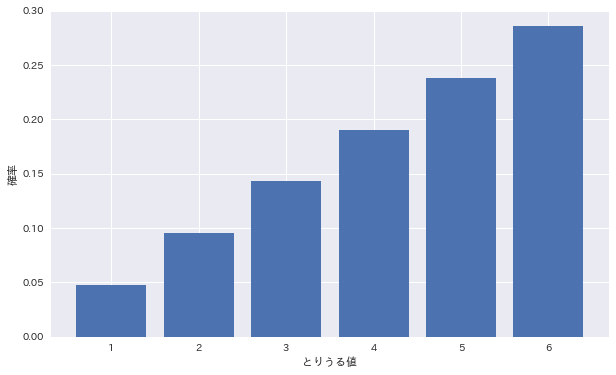

In [117]:
# 「とりうる値」と「確率」を棒グラフに図示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('とりうる値')
ax.set_ylabel('確率')

plt.show()

#### 確率の性質

- 確率は絶対に0以上
- すべての確率を足すと、1にならなければならない

$$
\begin{align}
    f(x_k) \geq 0 \\
    \sum_{k} f(x_k) = 1
\end{align}
$$

In [118]:
# 確率がすべて0以上であるかの確認 np.all()関数
np.all(prob >= 0)

True

In [119]:
# 確率の総和の確認
np.sum(prob)

1.000

#### 累積分布関数（cumulative distribution function, CDF）

- 「確率関数」
  - 「確率変数$X$」が、「$x$になるときの確率」を返す関数
- 「累積分布関数」
  - 「確率変数$X$」が、「$x$以下になるときの確率」を返す関数
  - サイコロの出目が「3」以下になる確率など

$$
F(x) = P(X \leq x) = \sum_{x_k \leq x} f(x_k)
$$

In [120]:
# 累積分布関数を作成する
def F(x):
    """いかさまサイコロの累積分布関数"""
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [121]:
# サイコロの出目が「3」以下になる確率
F(3)

0.286

#### 確率変数の変換

- 確率変数$X$に、2をかけて3を足した、$2X+3$は、
- 確率変数$2X+3$になる

In [122]:
# 2X+3を確率変数Yとし、Yの確率分布を作成する
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 5.1.2 １次元の離散型確率変数の指標

#### 期待値（expected value）

- 期待値
  - 確率変数の平均
  - $E(X)$
    - 期待値の演算としての意味合いが強い場合に用いる
  - $\mu$
    - 期待値の値そのものに関心がある場合に用いる
- 離散型確率変数の期待値（平均）は、
  - 確率変数の「とりうる値とその確率の積」の「総和」
  - 確率変数を無限回試行して得られた実現値の平均に一致する

$$
E(X) = \sum_{k} x_k f(x_k)
$$

In [123]:
# いかさまサイコロの期待値を定義どおりに計算する
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [124]:
# いかさまサイコロを100万（=10^6）回試行した実現値の平均を求める
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.335

確率変数$X$を、$2X+3$に変換した確率変数$Y$の期待値

$$
E(Y) = E(2X + 3) = \sum_{k} (2x_k + 3)f(x_k)
$$

#### 離散型確率変数の期待値

より一般的に、確率変数$X$の関数$g(X)$の期待値が定義できる。

$$
E(g(X)) = \sum_{k} g(x_k)f(x_k)
$$

引数$g$が、「確率変数に対する変換の関数」になっている。

In [125]:
# 期待値の関数を実装する
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum(
        [g(x_k) * f(x_k) for x_k in x_set]
    )

In [126]:
E(X)

4.333

In [127]:
E(X, g=lambda x: 2*x + 3)

11.667

期待値の線形性

a, bを実数、$X$を確率変数としたとき

$$
E(aX + b) = aE(X) + b
$$

が成り立つ。

In [128]:
2 * E(X) + 3

11.667

#### 分散

- 偏差の二乗の期待値として定義される。
- $V(X)$
  - 分散の演算としての意味合いが強い場合に用いる
- $\sigma^2$
  - 分散の値そのものに関心がある場合に用いる
- $\sigma$
  - 確率変数$X$の標準偏差

$$
V(X) = \sum_{k}(x_k - \mu)^2f(x_k)
$$

In [129]:
# いかさまサイコロの分散を求める
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

- 変換した確率変数についても分散を定義できる。
- 確率変数$X$を、$2X + 3$と変換した確率変数$Y$を考える。
- $\mu = E(2X + 3)$

$$
V(2X + 3) = \sum_{k}\left((2x_k + 3) - \mu \right)^2 f(x_k)
$$

#### 離散型確率変数の分散

より一般的に、確率変数$X$の関数$g(X)$の分散が定義できる。

$$
V(g(X)) = \sum_{k} (g(x_k) - E(g(X)))^2 f(x_k)
$$

In [130]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum(
        [(g(x_k)-mean)**2 * f(x_k) for x_k in x_set]
    )

In [131]:
V(X)

2.222

In [132]:
V(X, lambda x: 2*x + 3)

8.889

#### 分散の公式

a, bを実数、$X$を確率変数として、

$$
V(aX + b) = a^2V(X)
$$

が成り立つ。

In [133]:
# V(2X + 3) = 2^2V(X)
2**2 * V(X)

8.889

## 2次元の離散型確率変数

### 5.2.1 2次元の離散型確率変数の定義

#### 同時確率分布（join probability distribution）, 同時分布

- 2次元の確率変数では、
  - 1次元の確率変数を2つ同時に扱い$(X, Y)$と表記する。
- 2次元の確率変数の振る舞いは、
  - 「取りうる値の組み合わせの集合」と「その確率」に
- よって定まる。

- $(X, Y)$のとりうる値の組み合わせの集合を、
  - $\{(x_i, y_j)~|~i = 1, 2, ...; j = 1, 2, ...\}$
- とすると、
- 確率はそれぞれのとりうる値の組み合わせについて定義できて、
- 確率変数$X$が$x_i$、確率変数$Y$が$y_j$をとる確率は、
  - $P(X = x_i, Y = y_j) = p_{ij}~~(i = 1, 2, ...; j = 1, 2, ...)$
- と表すことができる。

In [134]:
# 表5.2: いかさまサイコロの同時確率分布
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

def f_XY(x, y):
    """いかさまサイコロの同時確率分布を作成"""
    if 1 <= y <= 6 and 1 <= (x - y) <= 6:
        return f"{y * (x - y)}/441"
    else:
        return 0


prob = np.array(
    [[f_XY(x_i, y_j) for y_j in y_set]
     for x_i in x_set]
)
prob


array([['1/441', '0', '0', '0', '0', '0'],
       ['2/441', '2/441', '0', '0', '0', '0'],
       ['3/441', '4/441', '3/441', '0', '0', '0'],
       ['4/441', '6/441', '6/441', '4/441', '0', '0'],
       ['5/441', '8/441', '9/441', '8/441', '5/441', '0'],
       ['6/441', '10/441', '12/441', '12/441', '10/441', '6/441'],
       ['0', '12/441', '15/441', '16/441', '15/441', '12/441'],
       ['0', '0', '18/441', '20/441', '20/441', '18/441'],
       ['0', '0', '0', '24/441', '25/441', '24/441'],
       ['0', '0', '0', '0', '30/441', '30/441'],
       ['0', '0', '0', '0', '0', '36/441']], dtype='<U21')

#### 同時確率関数（join probability function）

- 2次元確率分布の確率は、$x$と$y$を引数にとる関数とみることができる。
- $P(X = x, Y = y) = f_{XY}(x, y)$となる、関数$f_{XY}(x, y)$を、
- 「同時確率関数」という。

いかさまサイコロの同時確率関数は、

$$
f_{XY}(x, y) = 
\begin{cases}
    y(x - y)/441~~~(y \in \{1, 2, 3, 4, 5, 6\} & \text{かつ} & x-y \in \{1, 2, 3, 4, 5, 6\})
    \\
    0~~~(otherwise)
\end{cases}
$$

となる。

#### 確率の性質

2次元の離散確率変数も1次元のときと同様に、

- 確率は必ず0以上
- 全確率が1

でなければならない。

$$
\begin{align}
    f_{XY}(x_i, y_j) \geq 0 \\
    \sum_i \sum_j f_{XY}(x_i, y_j) = 1
\end{align}
$$

In [135]:
# XとYのとりうる値の集合を定義する
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)


In [136]:
# 同時確率関数を定義する
def f_XY(x, y):
    """いかさまサイコロの同時確率分布を作成"""
    if 1 <= y <= 6 and 1 <= (x - y) <= 6:
        return y * (x - y)/441
    else:
        return 0


In [137]:
# 確率変数(X, Y)の振る舞いは
# x_setとy_setとf_XYよって、定義される。
XY = [x_set, y_set, f_XY]

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_1206/3695453461.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolor(prob)
/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_1206/3695453461.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(c, ax=ax)


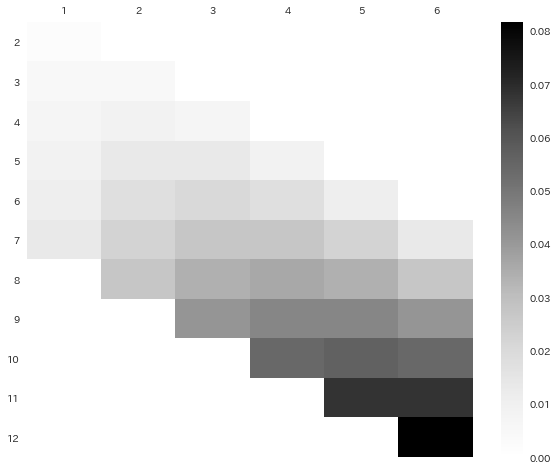

In [138]:
# 確率分布をヒートマップに図示する
prob = np.array(
    [[f_XY(x_i, y_j) for y_j in y_set]for x_i in x_set]
)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y軸を上から下へ昇順（小 -> 大）に設定
ax.invert_yaxis()
# x軸の目盛りをグラフ上部に表示
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)

plt.show()


In [139]:
# 確率の性質「確率が必ず0以上」の確認
np.all(prob >= 0)

True

In [140]:
# 確率の性質「全確率が1」の確認
np.sum(prob)

1.000

#### 周辺確率分布（marginal probability distribution）、周辺分布

- 確率変数$(X, Y)$は、同時確率関数$f_{XY}(x, y)$によって、同時に定義された。
- 「確率変数$X$のみの振る舞い」、すなわち「確率変数$X$」の「確率関数$f_X(x)$」を知りたい場合、

「確率変数$X$」の「確率関数$f_X(x)$」は、

「同時確率関数$f_{XY}$」に$Y$のとりうる値すべてを代入して足し合わせる

$$
f_X(x) = \sum_k f_{XY}(x, y_k)
$$

によって求められる。


In [141]:
# 図 5.3: 周辺分布
# いかさまサイコロのXの周辺分布
def f_X(x):
    return np.sum(f_XY(x, y_k) for y_k in y_set)
    
# いかさまサイコロのYの周辺分布
def f_Y(y):
    return np.sum(f_XY(x_k, y) for x_k in x_set)

In [142]:
# XとYの振る舞いをそれぞれ独立に考え、定義する
X = [x_set, f_X]
Y = [y_set, f_Y]

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_1206/1666940279.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(f_XY(x, y_k) for y_k in y_set)
/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_1206/1666940279.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(f_XY(x_k, y) for x_k in x_set)


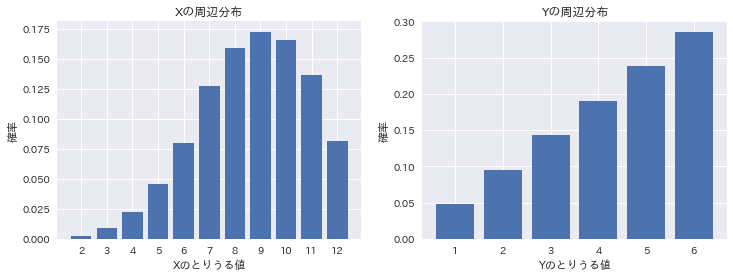

In [143]:
# XとY、それぞれの周辺分布を図示する
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('Xの周辺分布')
ax1.set_xlabel('Xのとりうる値')
ax1.set_ylabel('確率')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Yの周辺分布')
ax2.set_xlabel('Yのとりうる値')
ax2.set_ylabel('確率')
ax2.set_xticks(y_set)

plt.show()

### 5.2.2 2次元の離散確率変数の指標

#### 期待値

期待値は1次元のときとほぼ同じで、

$X$の期待値であれば$x-i$と確率の積の和で求めることができる。

$$
\mu_X = E(X) = \sum_i \sum_j x_i f_{XY} (x_i, y_i)
$$


In [144]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667


一般に、$X, Y$の関数$g(X, Y)$の期待値を以下のように定義できる。

$$
E\big( g(X, Y) \big) = \sum_i \sum_j g(x_i, y_j) f_{XY}(x_i, y_j)
$$

In [145]:
# X, Yの関数g(X, Y)の期待値の関数
def E(XY, g):
    """X, Yの関数g(X, Y)の期待値"""
    x_set, y_set, f_XY = XY
    return np.sum(
        [g(x_i, y_j) * f_XY(x_i, y_j) 
        for x_i in x_set for y_j in y_set]
    )

In [146]:
# Xの期待値
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [147]:
# Yの期待値
mean_Y = E(XY, lambda x, y: y)
mean_Y


4.333

#### 期待値の線形性

a, bを実数、$X, Y$を確率変数としたとき

$$
E(aX + bY) = aE(X) + bE(Y)
$$

が成り立つ。

In [148]:
a, b = 2, 3

In [149]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [150]:
a * mean_X + b * mean_Y

30.333

#### 分散

分散も1次元のときとほぼ同じで、

$X$のぶんさんであれば$X$についての偏差の二乗の期待値によってもとめることができる。

$$
\sigma_X^2 = V(X) = \sum_i \sum_j (x_i - \mu_X)^2 f_{XY}(x_i, y_j)
$$

In [151]:
np.sum(
    [(x_i - mean_X)**2 * f_XY(x_i, y_j) 
    for x_i in x_set for y_j in y_set]
)

4.444

一般に、$X, Y$の関数$g(X, Y)$の分散を、以下のように求めることができる。

$$
V\big( g(X, Y) \big) = \sum_i \sum_j \big(~g(x_i, y_j) - E(g(X, Y))~\big)^2 f_{XY}(x_i, y_j)
$$

In [152]:
def V(XY, g):
    """X, Yの関数g(X, Y)の分散の関数"""
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum(
        [(g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set]
    )


In [153]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [154]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

#### 共分散

共分散を使うことで、2つの確率変数$X, Y$の間にどの程度相関があるかわかる。

$$
\sigma_{XY} = Cov(X, Y) = \sum_i \sum_j (x_i - \mu_X)(y_j - \mu_Y) f_{XY}(x_i, y_i)
$$

In [159]:
def Cov(XY):
    """X, Yの関数g(X, Y)の共分散の関数"""
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum(
        [(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set]
    )


In [160]:
cov_xy = Cov(XY)
cov_xy

2.222

#### 分散と共分散の公式

a, bを実数、$X, Y$を確率変数としたとき、

$$
V(aX + bY) = a^2 V(X) + b^2 V(Y) + 2abCov(X, Y)
$$

が成り立つ。

In [161]:
# V(2X + 3Y) = 4V(X) + 9V(Y) + 12Cov(X, Y)
V(XY, lambda x, y: a*x + b*y)

64.444

In [162]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

#### 相関係数

共分散をそれぞれの標準偏差で割ることで求まる。

記号は$\rho$（ロー）が使われる。

$$
\rho_{XY} = \rho (X, Y) = \dfrac{\sigma_{XY}}{\sigma_X \sigma_Y}
$$

In [163]:
cov_xy / np.sqrt(var_X * var_Y)

0.707